In [1]:
from google.colab import files
uploaded = files.upload()

Saving mood_data.csv to mood_data.csv


In [2]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['mood_data.csv']))
df.head()

,playlist_id,playlist_owner,playlist,id,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,key_confidence,mode_confidence,tempo_confidence,time_signature_confidence,end_of_fade_in,start_of_fade_out,mood
0,37i9dQZF1DXdPec7aLTmlC,Spotify,Happy Hits!,6VrLYoQKdhu1Jruei06t65,Somebody To You,0.0587,0.526,185098,0.818,0.000000,3,0.333,-5.952,1,0.0358,171.960,4,0.896,0.359,0.701,0.149,0.982,0.19138,179.33351,Happy
1,37i9dQZF1DWSqBruwoIXkA,Spotify,sad hour,2fooMOezILHFlxkCqq3RRm,Rockland,0.7860,0.486,217369,0.402,0.000182,5,0.103,-11.389,1,0.0480,125.801,4,0.398,0.798,0.646,0.166,1.000,0.20893,207.52254,Sad
2,37i9dQZF1DXdPec7aLTmlC,Spotify,Happy Hits!,5KCbr5ndeby4y4ggthdiAb,Wonder,0.1310,0.333,172693,0.637,0.000018,1,0.149,-4.904,0,0.0581,139.898,4,0.132,0.107,0.337,0.303,0.340,0.20834,167.56680,Happy
3,37i9dQZF1DWXLSRKeL7KwM,Spotify,Energy Booster: Country,2EvddT8rcO99bKH0rDHAYG,We Are Tonight,0.0323,0.559,232107,0.812,0.000000,11,0.195,-5.347,1,0.0371,127.911,4,0.472,0.607,0.602,0.696,0.897,2.53678,213.43782,Energetic
4,37i9dQZF1DXdPec7aLTmlC,Spotify,Happy Hits!,78nplE9X2ZGvQh3TKgvldE,Rewrite The Stars (with James Arthur & Anne-Ma...,0.2370,0.670,218293,0.743,0.000000,10,0.465,-4.993,1,0.0393,125.944,4,0.571,0.586,0.420,0.952,0.977,2.74576,211.66150,Happy


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv("mood_data.csv")
df.head()
print(df)

                playlist_id playlist_owner  ... start_of_fade_out       mood
0    37i9dQZF1DXdPec7aLTmlC        Spotify  ...         179.33351      Happy
1    37i9dQZF1DWSqBruwoIXkA        Spotify  ...         207.52254        Sad
2    37i9dQZF1DXdPec7aLTmlC        Spotify  ...         167.56680      Happy
3    37i9dQZF1DWXLSRKeL7KwM        Spotify  ...         213.43782  Energetic
4    37i9dQZF1DXdPec7aLTmlC        Spotify  ...         211.66150      Happy
..                      ...            ...  ...               ...        ...
826  37i9dQZF1DWSf2RDTDayIx        Spotify  ...         153.60000      Happy
827  37i9dQZF1DWSf2RDTDayIx        Spotify  ...         212.45679      Happy
828  37i9dQZF1DWSf2RDTDayIx        Spotify  ...         175.08426      Happy
829  37i9dQZF1DWSf2RDTDayIx        Spotify  ...         183.84400      Happy
830  37i9dQZF1DWSf2RDTDayIx        Spotify  ...         192.82431      Happy

[831 rows x 25 columns]


In [ ]:
X = df[[
        'acousticness',
        'danceability',
        'duration_ms',
        'energy',
        'instrumentalness',
        'key',
        'liveness',
        'loudness',
        'mode',
        'speechiness',
        'tempo',
        'time_signature',
        'valence',
        'key_confidence',
        'mode_confidence',
        'tempo_confidence',
        'time_signature_confidence',
        'end_of_fade_in',
        'start_of_fade_out'
        ]]
qt = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0).fit(X)
X = qt.transform(X)
y = df['mood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

n_values = []
accuracy_values = []
weight_values = []
alg_values = []
split_values = []

for class_weight in [None, "balanced", "balanced_subsample"]:
  for split in range(1, 5):
    min_samples_split = split * 2
    for criterion in ["gini", "entropy"]:
      for i in range(5, 50):
          n = i * 10
          clf=RandomForestClassifier(
            n_estimators=n, 
            criterion=criterion, 
            min_samples_split=min_samples_split,
            class_weight=class_weight
          )
          clf.fit(X_train,y_train)
          y_pred=clf.predict(X_test)
          accuracy = metrics.accuracy_score(y_test, y_pred)
          n_values.append(n)
          accuracy_values.append(accuracy)
          weight_values.append(class_weight)
          alg_values.append(criterion)
          split_values.append(min_samples_split)

# https://seaborn.pydata.org/generated/seaborn.scatterplot.html


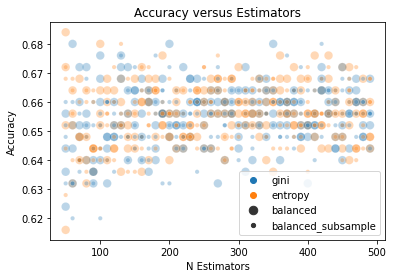

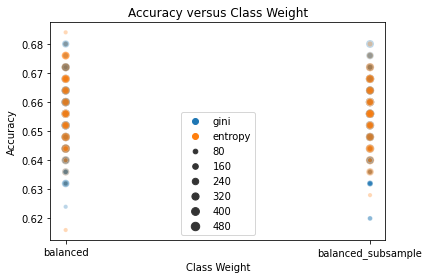

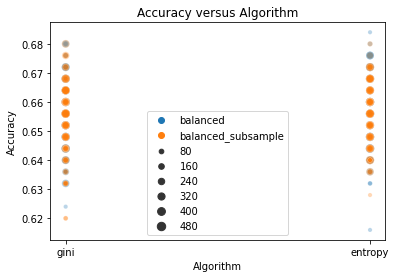

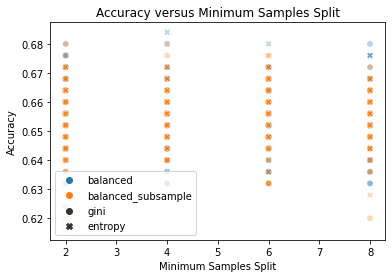

In [8]:
# %matplotlib inline
# # Creating a scatter plot
# sns.scatterplot(x=n_values, y=accuracy_values, size=split_values, hue=alg_values, style=weight_values, alpha=0.3)
# plt.xlabel('N Estimators')
# plt.ylabel('Accuracy')
# plt.title("Accuracy versus Estimators")
# plt.legend()
# plt.show()

# %matplotlib inline
# # Creating a scatter plot
# sns.scatterplot(x=weight_values, y=accuracy_values, size=n_values, hue=alg_values, style=split_values, alpha=0.3)
# # Add labels to your graph
# plt.xlabel('Class Weight')
# plt.ylabel('Accuracy')
# plt.title("Accuracy versus Class Weight")
# plt.legend()
# plt.show()

# %matplotlib inline
# # Creating a scatter plot
# sns.scatterplot(x=alg_values, y=accuracy_values, size=n_values, hue=weight_values, style=split_values, alpha=0.3)
# # Add labels to your graph
# plt.xlabel('Algorithm')
# plt.ylabel('Accuracy')
# plt.title("Accuracy versus Algorithm")
# plt.legend()
# plt.show()

# %matplotlib inline
# # Creating a scatter plot
# sns.scatterplot(x=split_values, y=accuracy_values, size=n_values, hue=weight_values, style=alg_values, alpha=0.3)
# # Add labels to your graph
# plt.xlabel('Minimum Samples Split')
# plt.ylabel('Accuracy')
# plt.title("Accuracy versus Minimum Samples Split")
# plt.legend()
# plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=n_values, y=accuracy_values, size=weight_values, hue=alg_values, alpha=0.3)
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Estimators")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=weight_values, y=accuracy_values, size=n_values, hue=alg_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Class Weight')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Class Weight")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=alg_values, y=accuracy_values, size=n_values, hue=weight_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Algorithm")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=split_values, y=accuracy_values, style=alg_values, hue=weight_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Minimum Samples Split')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Minimum Samples Split")
plt.legend()
plt.show()

No handles with labels found to put in legend.


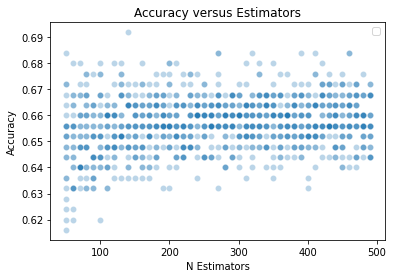

No handles with labels found to put in legend.


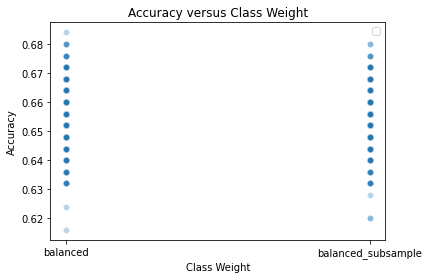

No handles with labels found to put in legend.


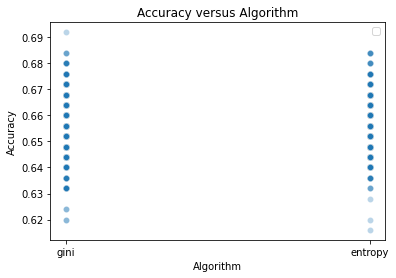

No handles with labels found to put in legend.


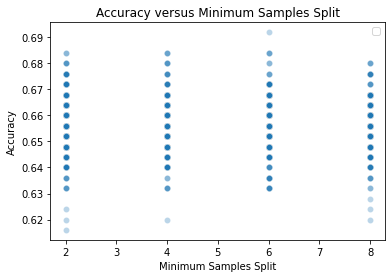

In [9]:
%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=n_values, y=accuracy_values, alpha=0.3)
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Estimators")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=weight_values, y=accuracy_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Class Weight')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Class Weight")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=alg_values, y=accuracy_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Algorithm")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=split_values, y=accuracy_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Minimum Samples Split')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Minimum Samples Split")
plt.legend()
plt.show()

In [ ]:
# Removing certain features.
X = df[['acousticness','danceability','energy','instrumentalness','key','loudness','mode','speechiness','tempo','time_signature','valence']]
y = df['mood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

n_values = []
accuracy_values = []
weight_values = []
alg_values = []

for algorithm in ["auto", "ball_tree", "kd_tree", "brute"]:
  for weight in ["uniform", "distance"]:
    for i in range(1, 21):
      n = i * 10
      clf = KNeighborsClassifier(n_neighbors=n, algorithm=algorithm, weights=weight)
      clf.fit(X_train, y_train)
      y_pred=clf.predict(X_test)
      accuracy = metrics.accuracy_score(y_test, y_pred)
      n_values.append(n)
      accuracy_values.append(accuracy)
      weight_values.append(weight)
      alg_values.append(algorithm)

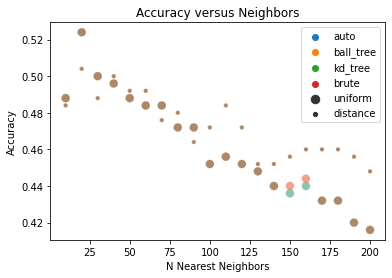

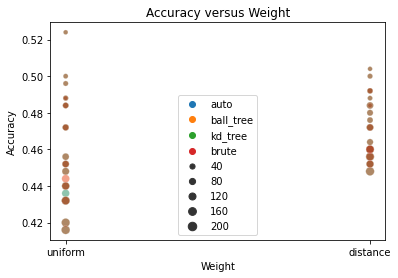

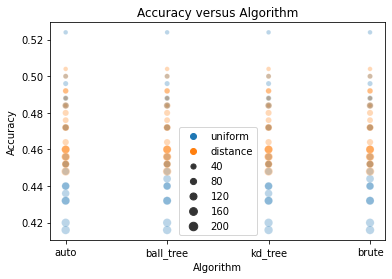

In [ ]:
%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=n_values, y=accuracy_values, size=weight_values, hue=alg_values, alpha=0.3)
plt.xlabel('N Nearest Neighbors')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Neighbors")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=weight_values, y=accuracy_values, size=n_values, hue=alg_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Weight')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Weight")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=alg_values, y=accuracy_values, size=n_values, hue=weight_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Algorithm")
plt.legend()
plt.show()